<a href="https://colab.research.google.com/github/electricalengineer173/AI-Q2-learning-resources/blob/master/DeepL_Part2_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Description of the data
The file "Spotify.csv" contains the following 18 columns:

• **ID** : unique identifier of the piece

• **Artists** : artists who participated in the piece

• **Title** : pulls the piece

• **Duration**: duration of the song in milliseconds

• **Year** : year of release of the song

• **Valence**: a measure from 0.0 to 1.0 describing the musical positivity conveyed by a song. High
valence songs sound more positive (e.g. happy, joyful, euphoric), while low valence songs sound
more negative (e.g. sad, depressed, angry)

• **Acoustics**: a confidence measure from 0.0 to 1.0 of the acoustics of the piece. The value 1.0
represents a high level of confidence that the piece is acoustic

• **Danceability**: ability of a piece to be danced according to a combination of musical elements. The
value 0.0 is the least danceable and the value 1.0 is the most danceable

• **Energy**: a measure of 0.0 to 1.0 which represents a measure of activity. In general, the energetic
pieces are fast and noisy

• **Explicit**: indicates whether the lyrics contain explicit content or not

• **Instrumental**: confidence measure from 0.0 to 1.0 related to the vocal. The closer the value is to
1.0, the more likely it is that the song does not contain any vocal content

• **Tone**: the estimated overall tone of the song

• **Direct**: detects the presence of an audience in the recording. Higher values represent a higher
probability that the song was played in front of an audience

• **Intensity**: the overall sound intensity of a piece in decibels (dB). The values of the sound intensity
are calculated as an average over the whole piece

• **Mode**: the mode indicates the modality (major or minor) of a piece, the type of scale from which
its melodic content is derived

• **Speech** : Speech detects the presence of spoken words in a piece. The more the recording is
exclusively vocal (e.g. talk show, audio book, poetry), the closer the value of the attribute is to 1.0

• **Tempo**: the estimated global tempo of a song in beats per minute

• **Popularity**: The popularity of a track is a value between 0 and 100, with 100 being the most
popular. Popularity is calculated by Spotify and is based, in large part, on the total number of plays
of the track and how recent they are.

In [64]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

1) **Discuss 4 Findings related to the variable "Popularty" with  graphs deemed relevant** 



In [65]:
# loading Data into df
df = pd.read_csv("Spotify.csv",sep=',')

In [66]:
#determining shape ==>(rows,column)
df.shape

(170653, 18)

In [67]:
#df.head()

In [68]:
#Checking info of dataframe such as number of columns and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            170653 non-null  object 
 1   Artistes      170653 non-null  object 
 2   Titre         170653 non-null  object 
 3   Durée         170653 non-null  int64  
 4   Année         170653 non-null  int64  
 5   Valence       165971 non-null  float64
 6   Acoustique    167095 non-null  float64
 7   Dansant       166933 non-null  float64
 8   Énergie       165954 non-null  float64
 9   Explicite     162402 non-null  object 
 10  Instrumental  168759 non-null  float64
 11  Tonalité      163035 non-null  float64
 12  Direct        170002 non-null  float64
 13  Intensité     163201 non-null  float64
 14  Mode          170565 non-null  object 
 15  Discours      164072 non-null  float64
 16  Tempo         170653 non-null  float64
 17  Popularité    170653 non-null  int64  
dtypes: f

In [69]:
# Checking NA values of each column
df.isna().sum()

ID                 0
Artistes           0
Titre              0
Durée              0
Année              0
Valence         4682
Acoustique      3558
Dansant         3720
Énergie         4699
Explicite       8251
Instrumental    1894
Tonalité        7618
Direct           651
Intensité       7452
Mode              88
Discours        6581
Tempo              0
Popularité         0
dtype: int64

In [70]:
# checking the sum of total NA values
df.isna().sum().sum()

49194

In [71]:
#df.describe()

In [72]:
# removing  NA values from df
df = df.dropna()

In [73]:
#Checking shape after th eremoval of NA values
df.shape

(127175, 18)

In [74]:
#replacing Oui with 1 and Non wih 0
df["Explicite"] = df["Explicite"].map({'Oui':1,'Non':0})

#replacing Majeur with 1 and Mineur wih 0
df["Mode"] = df["Mode"].map({'Majeur':1,'Mineur':0})

In [75]:
df.head(2)

,ID,Artistes,Titre,Durée,Année,Valence,Acoustique,Dansant,Énergie,Explicite,Instrumental,Tonalité,Direct,Intensité,Mode,Discours,Tempo,Popularité
0,4BJqT0PrAfrxzMOxytFOIz,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",831667,1921,0.0594,0.982,0.279,0.211,0,0.878,10.0,0.665,-20.096,1,0.0366,80.954,4
2,1o6I8BglA6ylDMrIELygv1,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,500062,1921,0.0394,0.961,0.328,0.166,0,0.913,3.0,0.101,-14.850,1,0.0339,110.339,5


In [76]:
df.info()
#max(df["Durée"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127175 entries, 0 to 170652
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            127175 non-null  object 
 1   Artistes      127175 non-null  object 
 2   Titre         127175 non-null  object 
 3   Durée         127175 non-null  int64  
 4   Année         127175 non-null  int64  
 5   Valence       127175 non-null  float64
 6   Acoustique    127175 non-null  float64
 7   Dansant       127175 non-null  float64
 8   Énergie       127175 non-null  float64
 9   Explicite     127175 non-null  int64  
 10  Instrumental  127175 non-null  float64
 11  Tonalité      127175 non-null  float64
 12  Direct        127175 non-null  float64
 13  Intensité     127175 non-null  float64
 14  Mode          127175 non-null  int64  
 15  Discours      127175 non-null  float64
 16  Tempo         127175 non-null  float64
 17  Popularité    127175 non-null  int64  
dtypes: f

In [77]:
df.describe()

,Durée,Année,Valence,Acoustique,Dansant,Énergie,Explicite,Instrumental,Tonalité,Direct,Intensité,Mode,Discours,Tempo,Popularité
count,1.271750e+05,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000,127175.000000
mean,2.308640e+05,1976.815058,0.528826,0.501495,0.537129,0.482753,0.084482,0.167233,5.202445,0.205821,-11.469217,0.706955,0.098206,116.852930,31.448524
std,1.260632e+05,25.900823,0.263401,0.375991,0.176165,0.267597,0.278110,0.313868,3.515092,0.174962,5.689741,0.455161,0.162663,30.715727,21.805836
min,5.991000e+03,1921.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,1.698005e+05,1956.000000,0.317000,0.101000,0.415000,0.255000,0.000000,0.000000,2.000000,0.098700,-14.607000,0.000000,0.034900,93.334000,11.000000
50%,2.074270e+05,1978.000000,0.540000,0.515000,0.548000,0.471000,0.000000,0.000220,5.000000,0.136000,-10.584000,1.000000,0.045000,114.714000,33.000000
75%,2.622130e+05,1999.000000,0.748000,0.892000,0.668000,0.704000,0.000000,0.102000,8.000000,0.261000,-7.184000,1.000000,0.075400,135.568000,48.000000
max,5.403500e+06,2020.000000,1.000000,0.996000,0.986000,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.969000,243.507000,99.000000


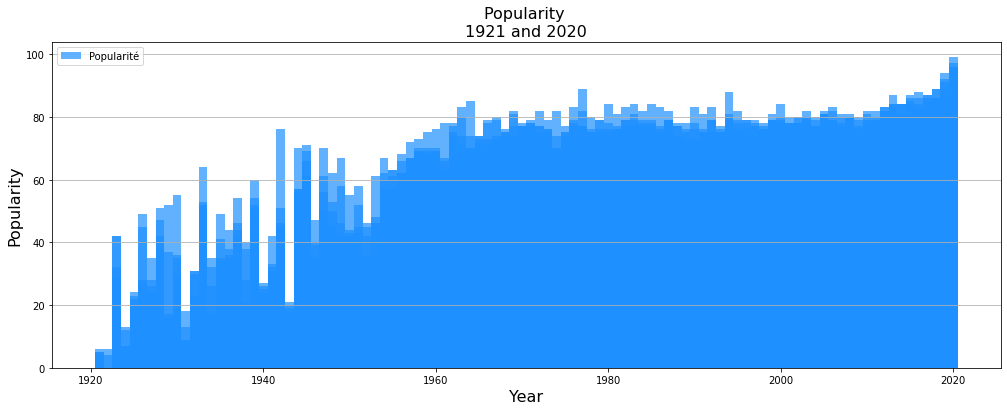

In [58]:
x = df['Année']
y = df['Popularité']

# Change the size of the figure (in inches).
plt.figure(figsize=(17,6)) 

# Bar plot for Popularité over year
plt.bar(x, y, label = 'Popularité', color = 'dodgerblue',  width = 1, align = 'center', alpha = 0.7)

# X-axis label.
plt.xlabel('Année', fontsize = 16)

# Y-axis label.
plt.ylabel('Popularité', fontsize = 16)

# Title of the plot.
plt.title('Popularité \n1921 and 2020', fontsize = 16)

# plt.grid(True)
plt.grid(axis='y')

# Legend for the plot.
plt.legend()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

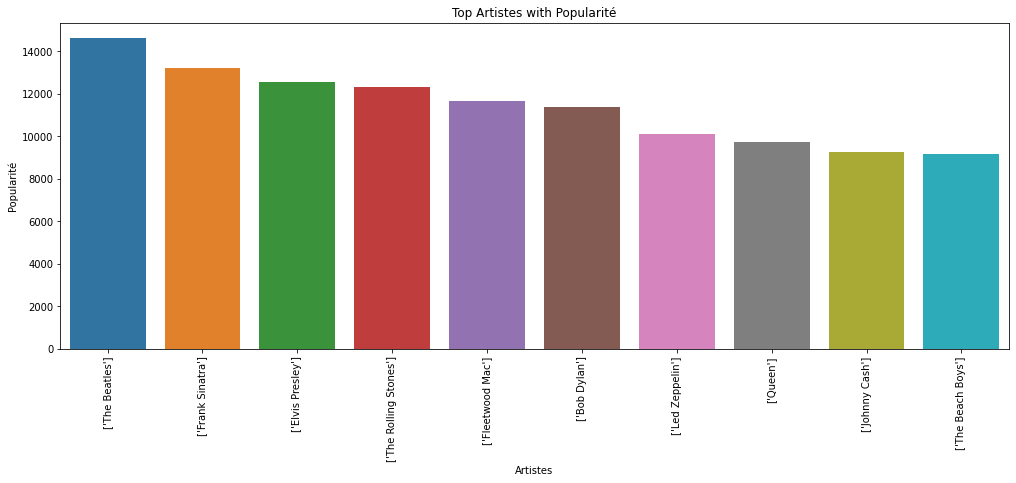

In [78]:
# Change the size of the figure (in inches).
plt.figure(figsize=(17,6)) 

x = df.groupby("Artistes")["Popularité"].sum().sort_values(ascending=False).head(10)

# bar plot of top 10 artist Artistes w.r.t Popularité
ax = sns.barplot(x.index,x)

#giving Lable and title
ax.set_title("Top Artistes with Popularité")
ax.set_ylabel("Popularité")
plt.xticks(rotation = 90)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Popularity Distribution')

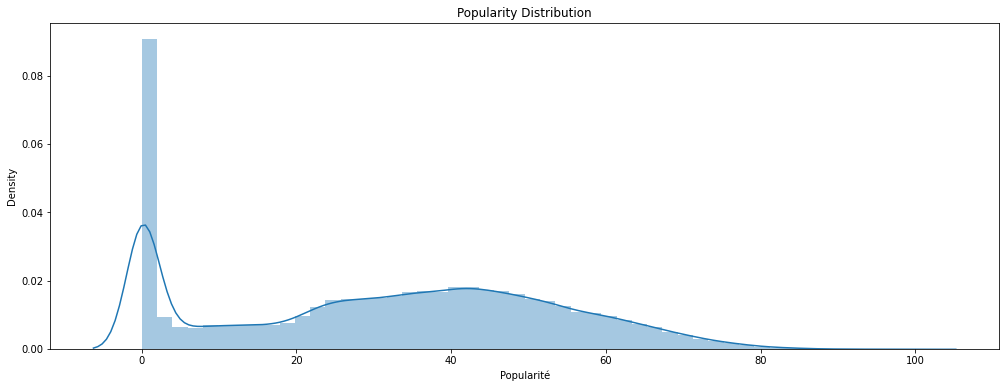

In [63]:
# Change the size of the figure (in inches).
plt.figure(figsize=(17,6)) 

#data distribution of Popularité (for songs with Popularity more than 90)  against the density distribution. 
sns.distplot(df['Popularité'])

#giving title
plt.title('Popularity Distribution')

Text(0.5, 1.0, 'Popularity Based on Mode')

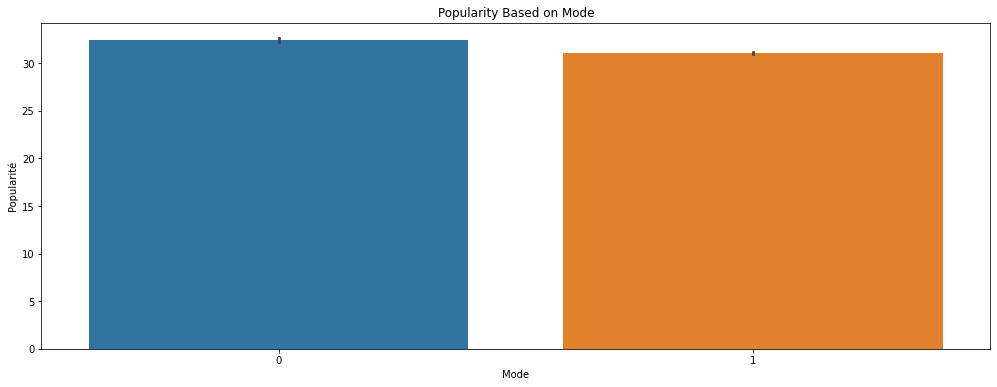

In [54]:
#Mode indicates the modality, major (1) or minor (0) of a track,
#the type of scale from which its melodic content is derived. Since
#a Major mode sounds more cheerful than a Minor mode, it is
#likely that a Major mode is more popularly used in hit songs.


# Change the size of the figure (in inches).
plt.figure(figsize=(17,6)) 

#bar plot based on mode
sns.barplot(x = 'Mode', y = 'Popularité', data = df)

#giving title
plt.title('Popularity Based on Mode')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Acoustique for Songs with More than 50 Popularity')

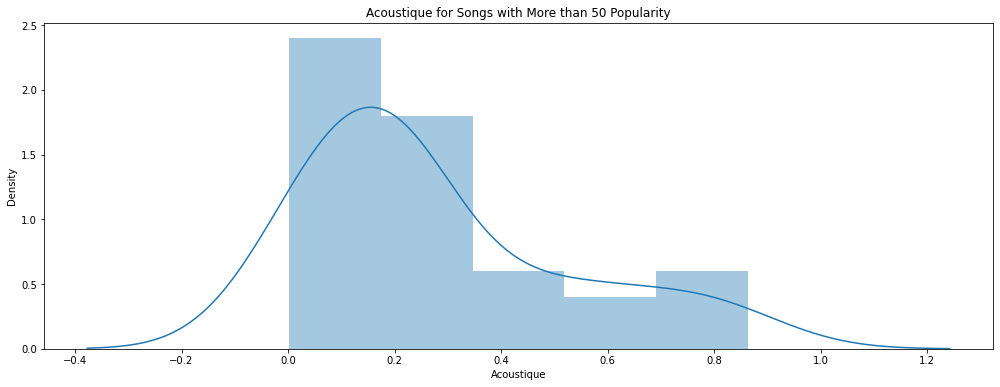

In [55]:
# Acoustique for songs with Popularity more than 90
plt.figure(figsize=(17,6)) 

# Separarting the Popularité > 90
pop_90 = df[df.Popularité > 90]

#data distribution of Acoustique (for songs with Popularity more than 90)  against the density distribution. 
sns.distplot(pop_90 ['Acoustique'])

# giving title
plt.title('Acoustique for Songs with More than 90 Popularity')

In [59]:
#plt.figure(figsize=(17,6)) 
#sns.jointplot(x = 'Valence', y = 'Popularité', data = df)